# The Art of Web Scraping

## Myles Braithwaite

### [@mylesb](https://twitter.com/mylesb) | [mylesb.ca](https://mylesb.ca/) | [me@mylesb.ca](mailto:me@mylesb.ca)

# The Web is for Humans

Web Scraping is the process of converting a webpage from human readable to machine readable.

![](media/ann-youre-beautiful-and-youre-organised.gif)

# Is it Legal

![](media/seninfeld-idk.gif)

**Remedies for Web Scraping** by John Gregory, <http://www.slaw.ca/2013/10/21/remedies-for-web-scraping/>

![](media/slaw-remedies-for-web-scraping.png)

# Is it against Term of Service

![](media/crazy-ex-girlfriend-yes.gif)

**Web Scraping and Crawling Are Perfectly Legal, Right?** by Benoit Bernard, <https://benbernardblog.com/web-scraping-and-crawling-are-perfectly-legal-right/>

![](media/web-scraping-and-crawling-are-perfectly-legal-right.png)

# Downloading HTML Data

In [2]:
import requests

resp = requests.get('https://www.theverge.com/2017/9/11/16286012/android-8-review-o-oreo-update-treble-notifications')

In [3]:
resp.content

b'Forbidden'

In [4]:
resp.status_code

403

![](media/im-getting-something.gif)

In [10]:
from contextlib import closing

from selenium.webdriver import Firefox
from selenium.webdriver.support.ui import WebDriverWait

In [11]:
with closing(Firefox()) as browser:
    browser.get('https://www.theverge.com/2017/9/11/16286012/android-8-review-o-oreo-update-treble-notifications')
    
    WebDriverWait(browser, timeout=10).until(lambda x: x.find_element_by_class_name('l-root'))
    
    content = browser.page_source

In [20]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(content, 'html.parser')

In [22]:
print(soup.find('h1', {'class': 'c-page-title'}).text)

print(soup.find('div', {'class': 'c-entry-content'}).text)

Android Oreo review: it’s what’s inside that counts

Every year, each review of the new version of Android has to come with a bunch of caveats — and the same applies to Android 8 Oreo. Android reviews are always about the future, not the present. Unlike iOS, you may not get the features you're reading about here until you buy your next phone. It's possible that your current phone will be updated, but it is going to take months of waiting and wondering if and when that will happen. The only sure way to get timely updates to Android is to buy a Pixel phone directly from Google. 
Google has tried to convince its partners in the Android ecosystem to solve these update problems over the years with cajoling, shaming, and begging. With Android Oreo, it's trying a new tactic that feels much more Google-ly: engineering.
The most important part of Android Oreo is something called Project Treble, but it’s not something you can see and use. Think of it as modularizing and compartmentalizing the gu

# Being a Good Web Citizen

![](media/gdp-country-1999-2016.png)

In [1]:
from bs4 import BeautifulSoup

# Beautiful Soup

## HTML Parser

In [2]:
with open('raw/gdp-country-1999-2016.html') as fobj:
    html = fobj.read()

In [3]:
soup = BeautifulSoup(html, 'html.parser')

print(soup.prettify())

<table class="table-chart-table">
 <caption class="table-chart-caption">
  Data table for: Gross domestic product (GDP), Total, US dollars/capita, 1999 – 2016
 </caption>
 <thead class="table-chart-thead">
  <tr class="table-chart-thead-tr">
   <th class="table-chart-thead-th" scope="column">
    <a class="table-chart-sort-link table-chart-sort-link-active" href="">
     Location ▾
    </a>
    <div class="table-chart-sticky-header-spacer">
    </div>
   </th>
   <th class="table-chart-thead-th" scope="column">
    <a class="table-chart-sort-link" href="">
     ▾ 1999
    </a>
    <div class="table-chart-sticky-header-spacer">
    </div>
   </th>
   <th class="table-chart-thead-th" scope="column">
    <a class="table-chart-sort-link" href="">
     ▾ 2000
    </a>
    <div class="table-chart-sticky-header-spacer">
    </div>
   </th>
   <th class="table-chart-thead-th" scope="column">
    <a class="table-chart-sort-link" href="">
     ▾ 2001
    </a>
    <div class="table-chart-sticky-h

In [4]:
rows = soup.find_all('tr', {'class': 'table-chart-tbody-tr'})

print(rows[0].prettify())

<tr class="table-chart-tbody-tr">
 <th class="table-chart-tbody-th" data-id="ARG" scope="row" title="Activate to highlight this location">
  Argentina
 </th>
 <td class="table-chart-td">
  <span class="table-chart-value table-chart-is-missing">
  </span>
 </td>
 <td class="table-chart-td">
  <span class="table-chart-value table-chart-is-missing">
  </span>
 </td>
 <td class="table-chart-td">
  <span class="table-chart-value table-chart-is-missing">
  </span>
 </td>
 <td class="table-chart-td">
  <span class="table-chart-value table-chart-is-missing">
  </span>
 </td>
 <td class="table-chart-td">
  <span class="table-chart-value table-chart-is-missing">
  </span>
 </td>
 <td class="table-chart-td">
  <span class="table-chart-value">
   12 588
  </span>
 </td>
 <td class="table-chart-td">
  <span class="table-chart-value">
   13 969
  </span>
 </td>
 <td class="table-chart-td">
  <span class="table-chart-value">
   15 430
  </span>
 </td>
 <td class="table-chart-td">
  <span class="table

In [5]:
data = []

for row in rows:
    row_data = []
    
    for col in row:
        row_data += [col.text.replace('\xa0', ''),]
    
    data += [row_data,]

print(data)

[['Argentina', '', '', '', '', '', '12588', '13969', '15430', '17109', '18009', '16900', '18700', '20075', '20064', '20704', '20308', '20982', '20452'], ['Australia', '26804', '28006', '29180', '30413', '31912', '33467', '35165', '37186', '38884', '39250', '40864', '42014', '43436', '42904', '46839', '46581', '46894', '47770'], ['Austria', '27548', '29301', '29725', '31119', '32000', '33660', '34878', '37459', '39152', '41058', '40713', '41918', '44254', '46254', '47734', '48603', '49440', '50125'], ['Belgium', '25651', '27981', '29041', '30491', '31064', '32274', '33347', '35423', '36871', '38144', '38071', '40176', '41511', '42639', '43757', '45004', '45861', '46701'], ['Brazil', '', '9084', '9314', '9615', '9790', '10506', '11056', '11708', '12607', '13363', '13308', '14340', '15071', '15517', '16117', '16473', '15869', '15243'], ['Bulgaria', '5751', '6373', '6925', '7726', '8343', '9129', '10211', '11320', '12796', '14329', '14161', '14963', '15676', '16208', '16632', '17391', '181

In [256]:
headings = soup.find('thead', {'class': 'table-chart-thead'})

columns = ()

for heading in headings.find('tr'):
    text = heading.text.replace('\xa0', '').replace('▾', '').strip()
    columns += (text,)

print(columns)

('Location', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016')


In [257]:
import pandas as pd

# Pandas

## Data Analysis Library

In [258]:
df = pd.DataFrame(data=data, columns=columns)

df.head()

,Location,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Argentina,,,,,,12588,13969,15430,17109,18009,16900,18700,20075,20064,20704,20308,20982,20452
1,Australia,26804,28006,29180,30413,31912,33467,35165,37186,38884,39250,40864,42014,43436,42904,46839,46581,46894,47770
2,Austria,27548,29301,29725,31119,32000,33660,34878,37459,39152,41058,40713,41918,44254,46254,47734,48603,49440,50125
3,Belgium,25651,27981,29041,30491,31064,32274,33347,35423,36871,38144,38071,40176,41511,42639,43757,45004,45861,46701
4,Brazil,,9084,9314,9615,9790,10506,11056,11708,12607,13363,13308,14340,15071,15517,16117,16473,15869,15243


In [259]:
df = df.apply(pd.to_numeric, errors='ignore')

df.head()

,Location,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Argentina,NaN,NaN,NaN,NaN,NaN,12588,13969,15430,17109,18009,16900,18700.0,20075.0,20064.0,20704.0,20308.0,20982.0,20452.0
1,Australia,26804.0,28006.0,29180.0,30413.0,31912.0,33467,35165,37186,38884,39250,40864,42014.0,43436.0,42904.0,46839.0,46581.0,46894.0,47770.0
2,Austria,27548.0,29301.0,29725.0,31119.0,32000.0,33660,34878,37459,39152,41058,40713,41918.0,44254.0,46254.0,47734.0,48603.0,49440.0,50125.0
3,Belgium,25651.0,27981.0,29041.0,30491.0,31064.0,32274,33347,35423,36871,38144,38071,40176.0,41511.0,42639.0,43757.0,45004.0,45861.0,46701.0
4,Brazil,NaN,9084.0,9314.0,9615.0,9790.0,10506,11056,11708,12607,13363,13308,14340.0,15071.0,15517.0,16117.0,16473.0,15869.0,15243.0


In [260]:
df = df.set_index('Location').transpose()

df

Location,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China (People's Republic of),Colombia,...,Saudi Arabia,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
1999,NaN,26804.0,27548.0,25651.0,NaN,5751.0,27746.0,8981.0,2650.0,NaN,...,27532.0,10702.0,17061.0,7489.0,19916.0,27148.0,33502.0,8608.0,23975.0,34585.0
2000,NaN,28006.0,29301.0,27981.0,9084.0,6373.0,29265.0,9524.0,2919.0,6603.0,...,28860.0,11323.0,18032.0,7849.0,21524.0,29258.0,35355.0,9426.0,26034.0,36419.0
2001,NaN,29180.0,29725.0,29041.0,9314.0,6925.0,30133.0,9920.0,3212.0,6780.0,...,28928.0,12398.0,19000.0,8117.0,23011.0,29702.0,36606.0,9103.0,27362.0,37240.0
2002,NaN,30413.0,31119.0,30491.0,9615.0,7726.0,30855.0,10218.0,3537.0,6968.0,...,28601.0,13290.0,20300.0,8425.0,24368.0,30588.0,37430.0,9208.0,28633.0,38122.0
2003,NaN,31912.0,32000.0,31064.0,9790.0,8343.0,32224.0,10690.0,3946.0,7294.0,...,30500.0,14123.0,21127.0,8734.0,25049.0,31471.0,37362.0,9491.0,29904.0,39606.0
2004,12588.0,33467.0,33660.0,32274.0,10506.0,9129.0,33815.0,11692.0,4441.0,7797.0,...,33248.0,15170.0,22790.0,9261.0,26237.0,33552.0,38879.0,10753.0,31638.0,41857.0
2005,13969.0,35165.0,34878.0,33347.0,11056.0,10211.0,36213.0,12668.0,5077.0,8325.0,...,35766.0,16572.0,23941.0,9929.0,27696.0,33967.0,40213.0,11773.0,32268.0,44237.0
2006,15430.0,37186.0,37459.0,35423.0,11708.0,11320.0,38010.0,15510.0,5869.0,9046.0,...,37855.0,18813.0,25765.0,10659.0,30859.0,37440.0,44705.0,13504.0,34344.0,46369.0
2007,17109.0,38884.0,39152.0,36871.0,12607.0,12796.0,39442.0,16755.0,6846.0,9810.0,...,40092.0,21071.0,27585.0,11369.0,32578.0,40564.0,49222.0,14710.0,35153.0,47987.0
2008,18009.0,39250.0,41058.0,38144.0,13363.0,14329.0,40278.0,16323.0,7616.0,10235.0,...,43147.0,23575.0,29615.0,11792.0,33442.0,41854.0,52097.0,15901.0,36058.0,48330.0


In [261]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

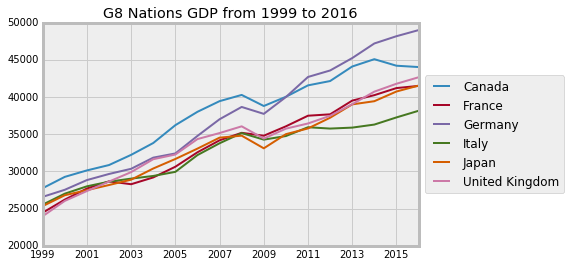

In [262]:
nations = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom']

df[nations].plot(kind='line', sort_columns=True, fontsize=10)
plt.title('G8 Nations GDP from 1999 to 2016')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.figure(dpi=90)